# Monte Carlo solution of pi
This notebook describes the procedure for calculating the numerical value of pi using the Monte Carlo (MC) method. In this MC simulation, the governing equations (Pythagorean theorem, area of a circle and square) will be known *a priori*, and the MC method will be used to calculate the numerical constant of pi. 
  
This MC simulation is based on areal assignments data points on an x-y plane bounded by *x* = [-1,1] and *y* = [-1,1] with [*x*,*y*] coordinates defined by randomly disributed numbers. Assuming uniformly distributed random numbers, the area of a circle with radius, *r* = 1 inscribed in a square is proportional to the number of points in the circle relative to the number of points within the square.

## Import standard libraries

In [19]:
#import random as rnd
#import math
import numpy as np
import matplotlib.pyplot as plt

plt.close('all')        # Close all open figures.
%matplotlib inline

## Define number of data points and assign random numbers
The value of pi will be calculated for a predefined value of *n*, the number of random data points within the square (bounded *xy* plane).

In [20]:
# Input desired value of n.
n = 1e3

ptsIn = np.zeros([int(n),1])       # Points inside circle.
ptsOut = np.zeros([int(n),1])      # Points outside circle.

# Create x-y pairs of random numbers on the interval [-1,1]
x = 2 * np.random.rand(int(n),1) - 1
y = 2 * np.random.rand(int(n),1) - 1

# Employ governing equation: r = sqrt(x^2 + y^2).
r = np.sqrt(x ** 2 + y ** 2)    # Use np. on numpy arrays.

## Employ governing equation
In order to determine whether a data point is within the inscribed circle with radius, *r* = 1, one of the governing equations must be defined. Here, the Pythagorean theorem will be used: *r*<sup>2</sup> = *x*<sup>2</sup> + *y*<sup>2</sup>. Any random numbers having *r* <= 1 are defined as being inside the circle.

In [21]:
r = np.sqrt(x ** 2 + y ** 2)    # Use np. functions on numpy arrays.

# Record position of each x-y pair.
ptsIn[r <= 1] = 1
ptsOut[r > 1] = 1

# Count data points within and outside inscribed circle.
sumIn = np.sum(ptsIn)       
sumOut = np.sum(ptsOut)     

## Calculate pi
The area of a circle, *A*<sub>c</sub> = pi *r*<sup>2</sup> and the area of a square, *A*<sub>s</sub> = (2*r*)<sup>2</sup>. The ratio of the area of the inscribed circle to the area of the square, *A*<sub>c</sub> / *A*<sub>s</sub> = pi / 4, so therefore pi = 4 *A*<sub>c</sub> / *A*<sub>c</sub>.  
Using the assumptions of the MC simulation, the area of the inscribed circle is proportional to the number of data points in the circle, and similarly the area of the square is equal to the total number of data points in the bounded *xy* plane.

In [22]:
# Calculate pi.
# Area of circle is proportional to sumIn, area of square is prop. to sumIn + sumOuts
piMC = 4 * sumIn / (sumIn + sumOut)

# Print result.
print('MC value for pi with n = ' + str(round(n)) + 
      ': ' + str(piMC))

MC value for pi with n = 1000: 3.1


## Plot results for a single value of *n*

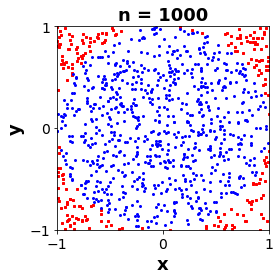

In [23]:
# Create new variables for plotting.
xIn = x[ptsIn == 1]; yIn = y[ptsIn == 1]
xOut = x[ptsOut == 1]; yOut = y[ptsOut == 1]

fig1 = plt.figure(figsize = (4,4))
plt.plot(xOut,yOut,'rs',markersize = 2)
plt.plot(xIn,yIn,'bo',markersize = 2)
plt.axis([-1,1,-1,1],'square')
plt.xticks((-1,0,1),fontsize = 14)
plt.yticks((-1,0,1),fontsize = 14)
plt.xlabel('x',fontweight = 'bold',fontsize = 18)
plt.ylabel('y',fontweight = 'bold',fontsize = 18)
plt.title('n = ' + str(round(n)),fontweight = 'bold',fontsize = 18)
plt.tight_layout()
plt.savefig('MonteCarlo_pi_n' + str(round(n)) + '.png',dpi = 300)

## Calculate error of MC simulation
As a function of the number of randomly distributed data points within the square (*n*), calculate the error of the value of pi calculated using the MC simulation to the true value of pi.

In [24]:
n = np.logspace(1,6,100)        # Array of simulation n's. 
piMC = np.zeros([len(n),1])     # MC value for pi.

for i in range(0,len(n)):
    
    pts = n[i]
    ptsIn = np.zeros([int(pts),1])       # Points inside circle.
    ptsOut = np.zeros([int(pts),1])      # Points outside circle.
    
    # Create x-y pairs of random numbers on the interval [-1,1]
    x = 2 * np.random.rand(int(pts),1) - 1
    y = 2 * np.random.rand(int(pts),1) - 1
    
    # Employ governing equation: r = sqrt(x^2 + y^2).
    r = np.sqrt(x ** 2 + y ** 2)    # Use np. on numpy arrays.
    
    # Record position of each x-y pair.
    ptsIn[r <= 1] = 1
    ptsOut[r > 1] = 1
    
    # Area of circle prop. to sumIn, Area of square prop. to sumIn + sumOut        
    # Ac / As = pi / 4, therefor pi = 4 * Ac / As  
    piMC[i] = 4 * np.sum(ptsIn) / (np.sum(ptsIn) + np.sum(ptsOut))

# Calculate error as a function of number of data points, n.
errorMC = (piMC - np.pi) / np.pi

## Plot results of MC simulation error using variable *n*

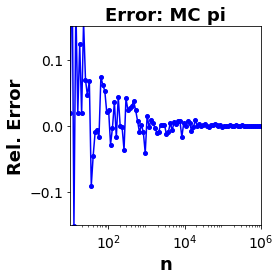

In [25]:
fig2 = plt.figure(figsize = (4,4))
plt.semilogx(n,errorMC,'bo-',markersize = 4)
plt.axis([n[0],n[-1],-0.15,0.15],'square')
plt.xticks((1e2,1e4,1e6),fontsize = 14)
plt.yticks((-0.1,0,0.1),fontsize = 14)
plt.xlabel('n',fontweight = 'bold',fontsize = 18)
plt.ylabel('Rel. Error',fontweight = 'bold',fontsize = 18)
plt.title('Error: MC pi',fontweight = 'bold',fontsize = 18)
plt.tight_layout()
plt.savefig('MonteCarlo_pi_Error.png',dpi = 300)